In [1]:
import os
from dotenv import load_dotenv
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity


#Settings
pd.set_option("display.max_columns", None)



In [2]:
load_dotenv('zillow.env')
API_KEY = '56da8635-db6d-4674-810a-b5b90ac3cb37'

In [3]:
def get_listings(API, link):
    url = "https://app.scrapeak.com/v1/scrapers/zillow/listing"
    
    query_strng = {"api_key": API,
                   "url": link
                   }
    return requests.request("GET",url, params=query_strng)



In [4]:
listing_url = ["https://www.zillow.com/miami-fl/?searchQueryState=%7B%22mapBounds%22%3A%7B%22north%22%3A25.881380922191553%2C%22east%22%3A-80.03321940771484%2C%22south%22%3A25.524388696288366%2C%22west%22%3A-80.65463359228515%7D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A12%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A12700%2C%22regionType%22%3A6%7D%5D%2C%22pagination%22%3A%7B%7D%7D",
           "https://www.zillow.com/arlington-va/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22mapBounds%22%3A%7B%22north%22%3A39.04768381076157%2C%22east%22%3A-76.73007390771484%2C%22south%22%3A38.73932083199976%2C%22west%22%3A-77.35148809228515%7D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%7D%2C%22isListVisible%22%3Atrue%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A30258%2C%22regionType%22%3A6%7D%2C%7B%22regionId%22%3A41568%2C%22regionType%22%3A6%7D%5D%2C%22mapZoom%22%3A12%7D",
           "https://www.zillow.com/denver-co/?searchQueryState=%7B%22mapBounds%22%3A%7B%22north%22%3A40.19077327121551%2C%22east%22%3A-104.44142431542967%2C%22south%22%3A39.582769610184165%2C%22west%22%3A-105.6842526845703%7D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A11%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A11093%2C%22regionType%22%3A6%7D%2C%7B%22regionId%22%3A30543%2C%22regionType%22%3A6%7D%5D%2C%22pagination%22%3A%7B%7D%7D",
           "https://www.zillow.com/atlanta-ga/?searchQueryState=%7B%22mapBounds%22%3A%7B%22north%22%3A33.92499099785205%2C%22east%22%3A-84.14820990771484%2C%22south%22%3A33.59560777695239%2C%22west%22%3A-84.76962409228516%7D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A12%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A37211%2C%22regionType%22%3A6%7D%5D%2C%22pagination%22%3A%7B%7D%7D",
           "https://www.zillow.com/san-francisco-ca/?searchQueryState=%7B%22mapBounds%22%3A%7B%22north%22%3A37.85354042270874%2C%22east%22%3A-122.27797595385742%2C%22south%22%3A37.696960579597885%2C%22west%22%3A-122.58868304614258%7D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A13%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A20330%2C%22regionType%22%3A6%7D%5D%2C%22pagination%22%3A%7B%7D%7D",
           "https://www.zillow.com/cleveland-oh/?searchQueryState=%7B%22mapBounds%22%3A%7B%22north%22%3A41.64582174753742%2C%22east%22%3A-81.39515290771485%2C%22south%22%3A41.349078810027834%2C%22west%22%3A-82.01656709228516%7D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A12%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A24115%2C%22regionType%22%3A6%7D%5D%2C%22pagination%22%3A%7B%7D%7D",
           "https://www.zillow.com/austin-tx/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22mapBounds%22%3A%7B%22north%22%3A30.635432669955684%2C%22east%22%3A-97.19473881542967%2C%22south%22%3A29.951247981999554%2C%22west%22%3A-98.4375671845703%7D%2C%22mapZoom%22%3A11%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A10221%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22built%22%3A%7B%22max%22%3A2023%7D%7D%2C%22isListVisible%22%3Atrue%7D"
        
        
        
    ]
    
    

In [5]:
df_listings_combined = pd.DataFrame()

for url in listing_url:
    listing_response = get_listings(API_KEY, url)
  
   
    #Returning results from loop to a dataframe
    df_listings = pd.json_normalize(listing_response.json()["data"]["cat1"]["searchResults"]["mapResults"])
    
    #Combining dataframes 
    df_listings_combined = pd.concat([df_listings_combined, df_listings], ignore_index=True)
    

#Printing out the results
print(f"Number of rows: {len(df_listings_combined)}")
print(f"Number of columns: {len(df_listings_combined.columns)}")
print(df_listings_combined)


Number of rows: 3505
Number of columns: 106
           zpid          price priceLabel  beds  baths    area statusType  \
0      43828273       $375,000      $375K   2.0    2.0   945.0   FOR_SALE   
1      44363861       $485,000      $485K   3.0    2.0  1509.0   FOR_SALE   
2      44274621     $2,300,000     $2.30M   5.0    5.0  5344.0   FOR_SALE   
3      44187488       $669,000      $669K   4.0    2.0  1879.0   FOR_SALE   
4      72564579       $695,000      $695K   5.0    3.0  2514.0   FOR_SALE   
...         ...            ...        ...   ...    ...     ...        ...   
3500  116081624       $398,000      $398K   3.0    3.0  1571.0   FOR_SALE   
3501   70331839     $2,995,000     $3.00M   5.0    5.0  6101.0   FOR_SALE   
3502        NaN  From $454,900        NaN   NaN    NaN     NaN   FOR_SALE   
3503        NaN  From $442,990        NaN   NaN    NaN     NaN   FOR_SALE   
3504        NaN  From $386,995        NaN   NaN    NaN     NaN   FOR_SALE   

          statusText isFavorite

In [6]:
to_drop = ["isFavorite", "isUserClaimingOwner", "isUserConfirmedClaim", "imgSrc", "hasImage",
           "visited", "shouldShowZestimateAsPrice", "detailUrl", "sgapt", "has3DModel",
           "hasVideo", "isHomeRec", "address", "hasAdditionalAttributions", "isFeaturedListing",
           "isShowcaseListing", "availabilityDate", "latLong.latitude", "latLong.longitude",
           "variableData.type", "variableData.text", "hdpData.homeInfo.zpid", "hdpData.homeInfo.streetAddress",
           "hdpData.homeInfo.latitude", "hdpData.homeInfo.longitude", "hdpData.homeInfo.price", "hdpData.homeInfo.bathrooms",
           "hdpData.homeInfo.bedrooms", "hdpData.homeInfo.livingArea", "hdpData.homeInfo.homeStatus", "hdpData.homeInfo.daysOnZillow",
           "hdpData.homeInfo.isFeatured", "hdpData.homeInfo.shouldHighlight", "hdpData.homeInfo.listing_sub_type.is_FSBA",
           "hdpData.homeInfo.isUnmappable", "hdpData.homeInfo.isPreforeclosureAuction", "hdpData.homeInfo.homeStatusForHDP",
           "hdpData.homeInfo.priceForHDP", "hdpData.homeInfo.isNonOwnerOccupied", "hdpData.homeInfo.isPremierBuilder",
           "hdpData.homeInfo.isZillowOwned", "hdpData.homeInfo.currency", "hdpData.homeInfo.country", "hdpData.homeInfo.taxAssessedValue",
           "hdpData.homeInfo.lotAreaValue", "hdpData.homeInfo.lotAreaUnit", "hdpData.homeInfo.isShowcaseListing", "variableData",
           "hdpData.homeInfo.zestimate", "hdpData.homeInfo.rentZestimate", "hdpData.homeInfo.unit", "hdpData.homeInfo.datePriceChanged",
           "hdpData.homeInfo.priceReduction", "hdpData.homeInfo.priceChange", "hdpData.homeInfo.listing_sub_type.is_newHome",
           "hdpData.homeInfo.newConstructionType", "streetViewMetadataURL", "streetViewURL", "variableData.data.isFresh",
           "buildingId", "lotId", "minBeds", "minBaths", "minArea", "unitCount", "buildingName", "isBuilding", "badgeInfo",
           "canSaveBuilding", "hdpData.homeInfo.listing_sub_type.is_openHouse", "hdpData.homeInfo.openHouse",
           "hdpData.homeInfo.open_house_info.open_house_showing", "hdpData.homeInfo.listing_sub_type.is_bankOwned",
           "hdpData.homeInfo.videoCount", "lotAreaString", "hdpData.homeInfo.isRentalWithBasePrice", 
           "hdpData.homeInfo.listing_sub_type.is_forAuction", "plid", "communityName", "style", 
           "isCdpResult", "hdpData.homeInfo.listing_sub_type.is_comingSoon", "priceLabel",
           "listingType", "pgapt", "isPropertyResultCDP", "hdpData.homeInfo.group_type", "hdpData.homeInfo.priceSuffix",
           "hdpData.homeInfo.providerListingID", "info3String", "info1String", "brokerName", "badgeInfo.type",
           "badgeInfo.text", "statusText", "statusType", "timeOnZillow"
           
           
           ]

In [7]:
zillow_data = df_listings_combined.drop(columns=to_drop)

In [8]:
zillow_data.head()

,zpid,price,beds,baths,area,hdpData.homeInfo.zipcode,hdpData.homeInfo.city,hdpData.homeInfo.state,hdpData.homeInfo.homeType
0,43828273,"$375,000",2.0,2.0,945.0,33138,Miami,FL,CONDO
1,44363861,"$485,000",3.0,2.0,1509.0,33177,Miami,FL,SINGLE_FAMILY
2,44274621,"$2,300,000",5.0,5.0,5344.0,33156,Miami,FL,SINGLE_FAMILY
3,44187488,"$669,000",4.0,2.0,1879.0,33155,Miami,FL,SINGLE_FAMILY
4,72564579,"$695,000",5.0,3.0,2514.0,33190,Miami,FL,SINGLE_FAMILY


In [9]:
#Replacing the '$' and ',' in the price column
zillow_data['price'] = zillow_data['price'].str.replace('$', '').str.replace(',', '').str.replace('From', '').str.replace('+', '')

#Replacing the 'K' notation
zillow_data['price'] = zillow_data['price'].replace(r'[Kk]', '', regex=True).astype(float)

#Converting price column to int data type
zillow_data['price'] = zillow_data['price'].astype(int)

C:\Users\bartl\AppData\Local\Temp\ipykernel_41564\3547591807.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  zillow_data['price'] = zillow_data['price'].str.replace('$', '').str.replace(',', '').str.replace('From', '').str.replace('+', '')


In [10]:
#Replacing 525 with 525000
zillow_data['price'] = zillow_data['price'].replace([525], 525000)

In [11]:
#viewing the number of missing values in the data
zillow_data.isna().sum()

zpid                         351
price                          0
beds                         398
baths                        382
area                         397
hdpData.homeInfo.zipcode     351
hdpData.homeInfo.city        351
hdpData.homeInfo.state       351
hdpData.homeInfo.homeType    351
dtype: int64

After viewing the amount of missing values in the data, I decided to drop all missing values. There were missing values in the state column and since we couldn't determine the state those values belonged to, they were all dropped. A similar approach was taken for the beds and baths columns. We couldn't determine the number of bedrooms or bathrooms in a house based on the data present so all rows with values missing in those columns were dropped. I did leave in place rows with 0 beds or 0 baths as these may represent studio style living or shared living areas. I decided not to use any sort of data smoothing methods at this time due to the nature of the data. If we applied the standard deviation method or median method to the bed and bath column, that would create a large bias in the data as we may end up with a house that costs only 100,000 but has 4 beds and 3 baths. A result like that would cause our recommendation system to always pick that option. 

In [12]:
zillow_data.dropna(inplace=True)

In [13]:
zillow_data.head()

,zpid,price,beds,baths,area,hdpData.homeInfo.zipcode,hdpData.homeInfo.city,hdpData.homeInfo.state,hdpData.homeInfo.homeType
0,43828273,375000,2.0,2.0,945.0,33138,Miami,FL,CONDO
1,44363861,485000,3.0,2.0,1509.0,33177,Miami,FL,SINGLE_FAMILY
2,44274621,2300000,5.0,5.0,5344.0,33156,Miami,FL,SINGLE_FAMILY
3,44187488,669000,4.0,2.0,1879.0,33155,Miami,FL,SINGLE_FAMILY
4,72564579,695000,5.0,3.0,2514.0,33190,Miami,FL,SINGLE_FAMILY


There are a few values in the dataframe that is less than 1000, in order to stop the model from always selecting those are options, we will remove anything from the dataframe that is less than 1000 in price. We're also going to remove rows where the area is equal to 0 as this may skew results later. We want to include the area column in our recommendation system as part of the family factor. 

In [14]:
zillow_data = zillow_data[zillow_data['price'] >= 1000]
zillow_data = zillow_data[zillow_data['area'] >= 2]

In [15]:
zillow_data.head()

,zpid,price,beds,baths,area,hdpData.homeInfo.zipcode,hdpData.homeInfo.city,hdpData.homeInfo.state,hdpData.homeInfo.homeType
0,43828273,375000,2.0,2.0,945.0,33138,Miami,FL,CONDO
1,44363861,485000,3.0,2.0,1509.0,33177,Miami,FL,SINGLE_FAMILY
2,44274621,2300000,5.0,5.0,5344.0,33156,Miami,FL,SINGLE_FAMILY
3,44187488,669000,4.0,2.0,1879.0,33155,Miami,FL,SINGLE_FAMILY
4,72564579,695000,5.0,3.0,2514.0,33190,Miami,FL,SINGLE_FAMILY


In [16]:
#Renaming the columns for easier access 
zillow_data.rename(columns={'hdpData.homeInfo.zipcode' : 'zipcode', 'hdpData.homeInfo.city' : 'city', 'hdpData.homeInfo.state' : 'state', 'hdpData.homeInfo.homeType' : 'homeType'}, inplace=True)

In [17]:
#Creating a new column that calculates the price per square foot
zillow_data['pricePerSQFT'] = round(zillow_data['price'] / zillow_data['area'])

In [18]:
#Converting the results to an interger
zillow_data['pricePerSQFT'] = zillow_data['pricePerSQFT'].astype(int)

<AxesSubplot:ylabel='Frequency'>

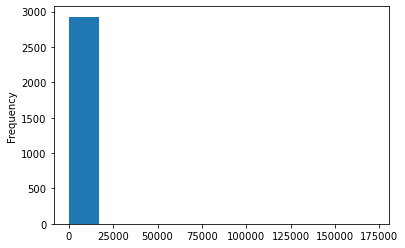

In [19]:
zillow_data['pricePerSQFT'].plot.hist(label='Housing Costs')


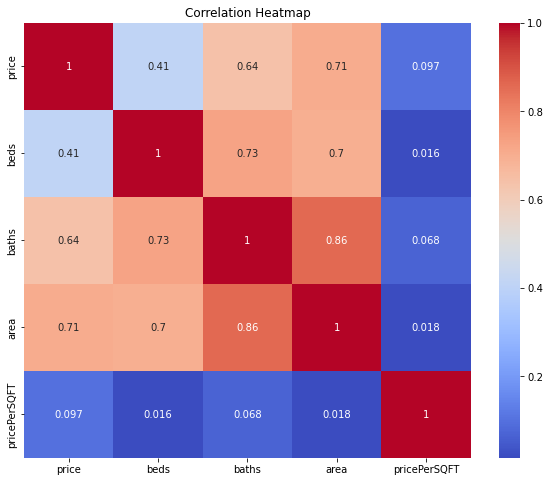

In [20]:
zillow_matrix = zillow_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(zillow_matrix, annot=True, cmap='coolwarm')

plt.title("Correlation Heatmap")
plt.show()

In [26]:
selected_features = ['beds', 'baths', 'area', 'pricePerSQFT', 'homeType']

In [27]:
features = zillow_data[selected_features]

In [35]:
#scaled_features = (features - features.min()) / (features.max() - features.min())


In [29]:
encoded_features = pd.get_dummies(features, columns=['homeType'])


In [30]:
similarity_matrix = cosine_similarity(encoded_features)

In [33]:
def housing_recommendation(input_features, similarity_matrix, k=5):
    #
    input_index = input_features.name
    
    similarities = similarity_matrix[input_index]
    
    top_indices = similarities.argsort()[::-1][1:k+1]
    
    return zillow_data.iloc[top_indices]



In [39]:
input_house = encoded_features.iloc[6]
recommendations = housing_recommendation(input_house, similarity_matrix, k=5)
print(recommendations)

          zpid    price  beds  baths    area zipcode       city state  \
494   54591284   899999   3.0    3.0  2663.0   33186      Miami    FL   
1759  35834823   479900   4.0    3.0  1949.0   30314    Atlanta    GA   
836   12108073   995000   4.0    4.0  2808.0   22202  Arlington    VA   
1470  13197178  1150000   3.0    3.0  3023.0   80304    Boulder    CO   
1838  14552470   685000   4.0    3.0  2336.0   30345    Atlanta    GA   

           homeType  pricePerSQFT  
494   SINGLE_FAMILY           338  
1759  SINGLE_FAMILY           246  
836       TOWNHOUSE           354  
1470  SINGLE_FAMILY           380  
1838  SINGLE_FAMILY           293  


In [53]:
def evaluate_recommendation(input_houses, similarity_matrix, k=5):
    avg_precision = 0.0
    num_evaluations = 0
    
    for _, input_house in input_houses.iterrows():
        input_index = input_house.name
        
        #Calulating the cosine similarity between the input and all other houses
        similarities = similarity_matrix[input_index]
        
        #Getting the indices of the top k similar houses
        top_indices = similarities.argsort()[::-1][1:k+1]
        
        #Getting the recommended houses from the dataset
        recommendations = encoded_features.iloc[top_indices]
        
        #Calculating the precision at k
        precision = len(recommendations[recommendations['zipcode'] == input_house['zipcode']]) / k
        
        #Updating the average precision
        avg_precision += precision
        num_evaluations += 1
    
    map_score = avg_precision / num_evaluations
    
    return map_score
        
        

In [54]:
input_houses = encoded_features.head(10)
map_score = evaluate_recommendation(input_houses, similarity_matrix, k=5)
print(f"MAP Score: {map_score}")

KeyError: 'zipcode'

In [36]:
#Saving data frames for later use
zillow_data.to_csv(r'../data/zillow_data.csv')
df_listings_combined.to_csv(r'../data/df_listings_combined.csv')